# 1. Cohort Retention Analysis on Events (Shrimp News, Shrimp Price, Log In, Pond Monitoring System)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

#### Data Source

Data Source for Event's Retention Cohort Analysis (processed in BigQuery):

SELECT entity_id, date
FROM `bia-binar-2021.Jala.app_event_count` 
WHERE event = 'Visit Shrimp News' AND total_event!=0;

SELECT entity_id, date
FROM `bia-binar-2021.Jala.app_event_count` 
WHERE event = 'Shrimp Price' AND total_event!=0;

SELECT entity_id, date
FROM `bia-binar-2021.Jala.app_event_count` 
WHERE event = 'Log in' AND total_event!=0;

SELECT entity_id, date
FROM `bia-binar-2021.Jala.app_event_count` 
WHERE event = 'Visit Pond Monitoring Page' AND total_event!=0;

### Shrimp News Event - Cohort Retention Analysis

index        0
entity_id    0
date         0
dtype: int64

(98646, 3)

19.99% of customers visit news more than once.


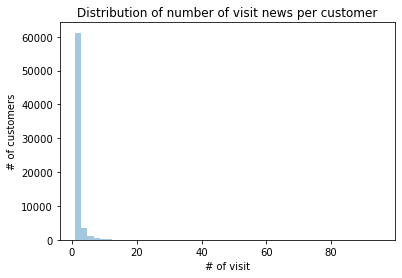

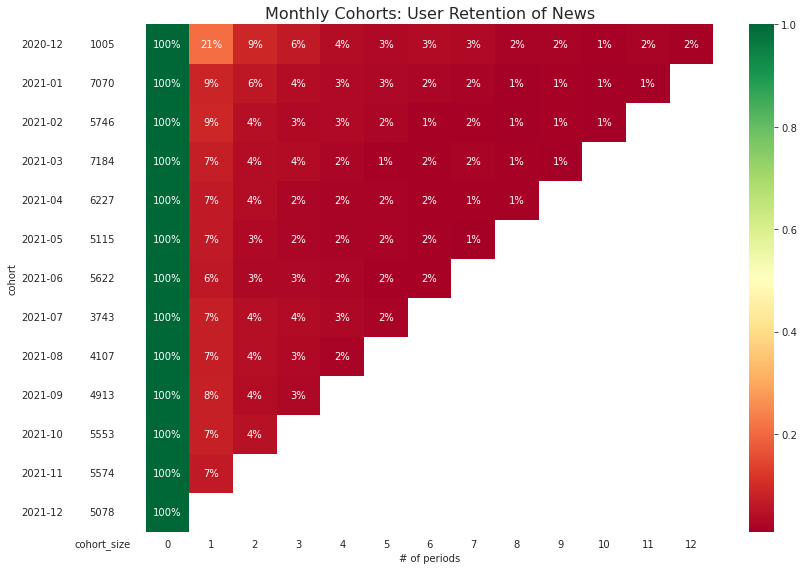

In [29]:
df_news = pd.read_csv('News.csv')
df_news.reset_index(inplace=True)
df_news.head()

display(df_news.isnull().sum())
display(df_news.shape)

df_news.columns

df_news.describe().transpose()

n_orders = df_news.groupby(['entity_id'])['index'].nunique() #customer with its news visit freq 

mult_visit_pct = np.sum(n_orders > 1) / df_news['entity_id'].nunique() #number of cust who visit news more than 1

print(f'{100 * mult_visit_pct:.2f}% of customers visit news more than once.')

df_news.groupby(['entity_id'])['index'].nunique()

df_news['entity_id'].nunique()

ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of visit news per customer',
       xlabel='# of visit', 
       ylabel='# of customers');

#start to cohort analysis

df_news['date'] = pd.to_datetime(df_news.date, format='%Y-%m-%d %H:%M:%S')

# Cal Month
df_news['visit_month'] = df_news['date'].dt.to_period('M')
df_news['cohort'] = df_news.groupby('entity_id')['date'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_news

df_cohort = df_news.groupby(['cohort', 'visit_month']) \
              .agg(n_customers=('entity_id', 'nunique')) \
              .reset_index(drop=False)
#df_cohort

df_cohort['period_number'] = (df_cohort.visit_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention of News', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

fig.savefig('news_retention.jpg', dpi=300)

### Shrimp Price - Cohort Retention Analysis

index        0
entity_id    0
date         0
dtype: int64

(28404, 3)

25.41% of customers visit shrimp price more than once.


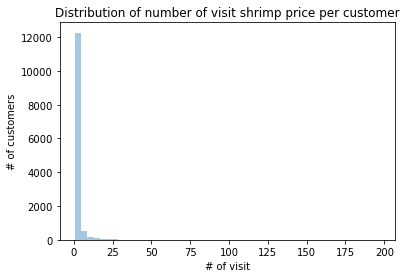

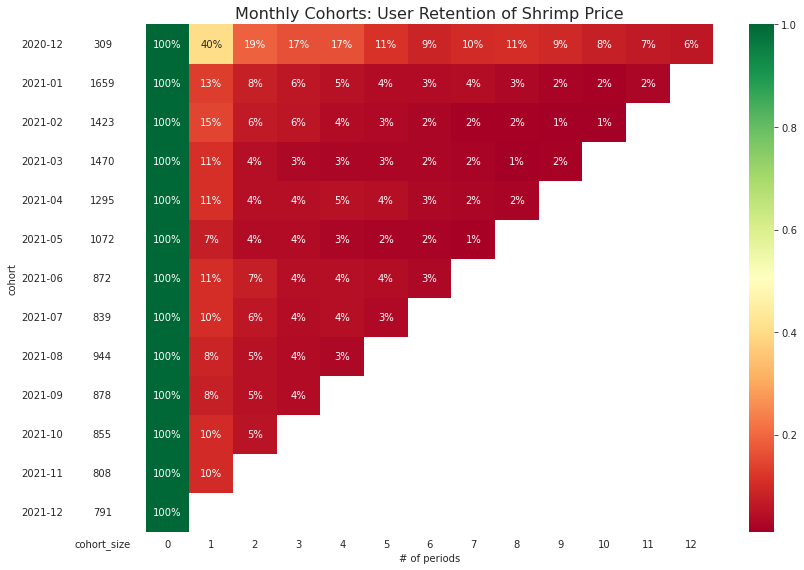

In [30]:
df_news = pd.read_csv('Shrimp_Price.csv')
df_news.reset_index(inplace=True)
df_news.head()

display(df_news.isnull().sum())
display(df_news.shape)

df_news.columns

df_news.describe().transpose()

n_orders = df_news.groupby(['entity_id'])['index'].nunique() #customer with its news visit freq 

mult_visit_pct = np.sum(n_orders > 1) / df_news['entity_id'].nunique() #number of cust who visit news more than 1

print(f'{100 * mult_visit_pct:.2f}% of customers visit shrimp price more than once.')

df_news.groupby(['entity_id'])['index'].nunique()

df_news['entity_id'].nunique()

ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of visit shrimp price per customer',
       xlabel='# of visit', 
       ylabel='# of customers');

#start to cohort analysis

df_news['date'] = pd.to_datetime(df_news.date, format='%Y-%m-%d %H:%M:%S')

# Cal Month
df_news['visit_month'] = df_news['date'].dt.to_period('M')
df_news['cohort'] = df_news.groupby('entity_id')['date'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_news

df_cohort = df_news.groupby(['cohort', 'visit_month']) \
              .agg(n_customers=('entity_id', 'nunique')) \
              .reset_index(drop=False)
#df_cohort

df_cohort['period_number'] = (df_cohort.visit_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention of Shrimp Price', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

fig.savefig('shrimp_price_retention.jpg', dpi=300)

### Log-In - Cohort Retention Analysis

index        0
entity_id    0
date         0
dtype: int64

(8630, 3)

64.63% of customers visit Log-in more than once.


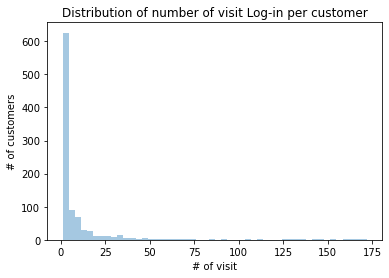

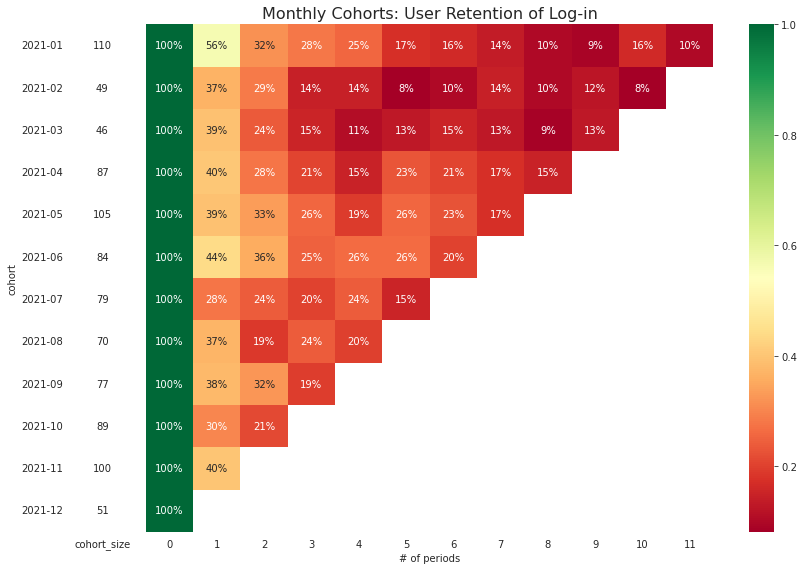

In [31]:
df_news = pd.read_csv('Log_In.csv')
df_news.reset_index(inplace=True)
df_news.head()

display(df_news.isnull().sum())
display(df_news.shape)

df_news.columns

df_news.describe().transpose()

n_orders = df_news.groupby(['entity_id'])['index'].nunique() #customer with its news visit freq 

mult_visit_pct = np.sum(n_orders > 1) / df_news['entity_id'].nunique() #number of cust who visit news more than 1

print(f'{100 * mult_visit_pct:.2f}% of customers visit Log-in more than once.')

df_news.groupby(['entity_id'])['index'].nunique()

df_news['entity_id'].nunique()

ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of visit Log-in per customer',
       xlabel='# of visit', 
       ylabel='# of customers');

#start to cohort analysis

df_news['date'] = pd.to_datetime(df_news.date, format='%Y-%m-%d %H:%M:%S')

# Cal Month
df_news['visit_month'] = df_news['date'].dt.to_period('M')
df_news['cohort'] = df_news.groupby('entity_id')['date'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_news

df_cohort = df_news.groupby(['cohort', 'visit_month']) \
              .agg(n_customers=('entity_id', 'nunique')) \
              .reset_index(drop=False)
#df_cohort

df_cohort['period_number'] = (df_cohort.visit_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention of Log-in', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

fig.savefig('Log-In_retention.jpg', dpi=300)

### Pond Monitoring System - Cohort Retention Analysis

index        0
entity_id    0
date         0
dtype: int64

(2133, 3)

54.59% of customers visit FMS more than once.


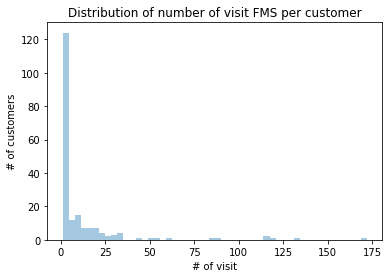

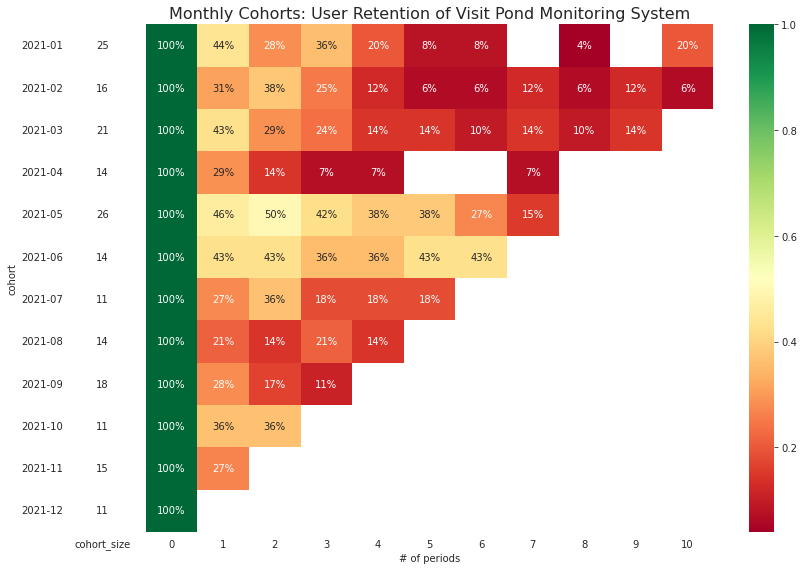

In [32]:
df_news = pd.read_csv('FMS.csv')
df_news.reset_index(inplace=True)
df_news.head()

display(df_news.isnull().sum())
display(df_news.shape)

df_news.columns

df_news.describe().transpose()

n_orders = df_news.groupby(['entity_id'])['index'].nunique() #customer with its news visit freq 

mult_visit_pct = np.sum(n_orders > 1) / df_news['entity_id'].nunique() #number of cust who visit news more than 1

print(f'{100 * mult_visit_pct:.2f}% of customers visit FMS more than once.')

df_news.groupby(['entity_id'])['index'].nunique()

df_news['entity_id'].nunique()

ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of visit FMS per customer',
       xlabel='# of visit', 
       ylabel='# of customers');

#start to cohort analysis


df_news['date'] = pd.to_datetime(df_news.date, format='%Y-%m-%d %H:%M:%S')

# Cal Month
df_news['visit_month'] = df_news['date'].dt.to_period('M')
df_news['cohort'] = df_news.groupby('entity_id')['date'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_news

df_cohort = df_news.groupby(['cohort', 'visit_month']) \
              .agg(n_customers=('entity_id', 'nunique')) \
              .reset_index(drop=False)
#df_cohort

df_cohort['period_number'] = (df_cohort.visit_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention of Visit Pond Monitoring System', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

fig.savefig('FMS_retention.jpg', dpi=300)

# 2. Correlation of Events to Subscription 

In [3]:
df_corr = pd.read_csv('corr2event.csv')
df_corr

,news,log_in,price,FMS,Pro
0,1,1,0,0,0
1,1,1,0,0,0
2,0,2,0,0,1
3,0,2,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
81550,1,0,1,0,0
81551,1,0,1,0,0
81552,1,0,1,0,0
81553,1,0,1,0,0


<AxesSubplot:>

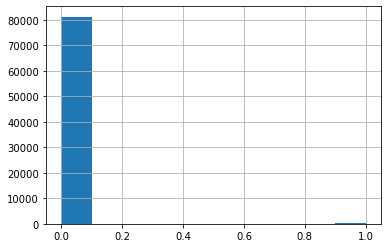

In [9]:
df_corr.Pro.hist()


In [11]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df_corr.Pro.values)

NormaltestResult(statistic=158833.63512299827, pvalue=0.0)

In [4]:
df_corr = df_corr[['news','log_in','price','FMS','Pro']]
df_corr

,news,log_in,price,FMS,Pro
0,1,1,0,0,0
1,1,1,0,0,0
2,0,2,0,0,1
3,0,2,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
81550,1,0,1,0,0
81551,1,0,1,0,0
81552,1,0,1,0,0
81553,1,0,1,0,0


In [5]:
#Multicollinear Check

import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df_corr[['news','log_in','price','FMS']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature       VIF
0    news  1.050700
1  log_in  2.016937
2   price  1.188437
3     FMS  1.852706


VIF starts at 1 and has no upper limit

VIF = 1, no correlation between the independent variable and the other variables

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

In [6]:
df_corr.corr()

,news,log_in,price,FMS,Pro
news,1.000000,0.005799,-0.662412,0.063859,0.050493
log_in,0.005799,1.000000,0.336151,0.675159,0.503102
price,-0.662412,0.336151,1.000000,0.240256,0.174713
FMS,0.063859,0.675159,0.240256,1.000000,0.510294
Pro,0.050493,0.503102,0.174713,0.510294,1.000000


C:\Users\Fitrie Ratnasari\AppData\Local\Temp\ipykernel_2148\1687862439.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))


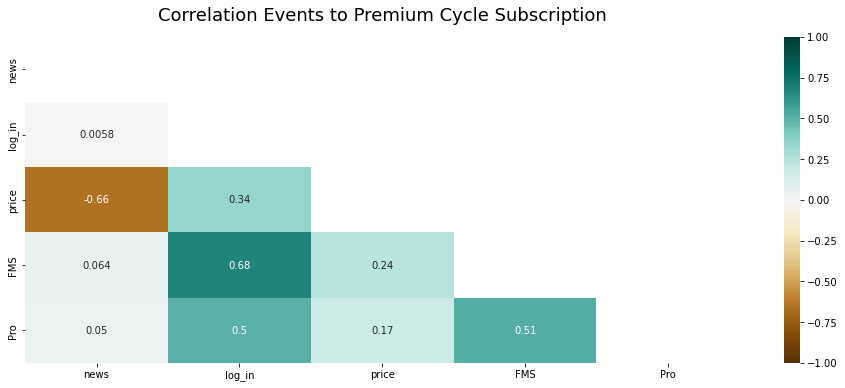

In [7]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Events to Premium Cycle Subscription', fontdict={'fontsize':18}, pad=16);

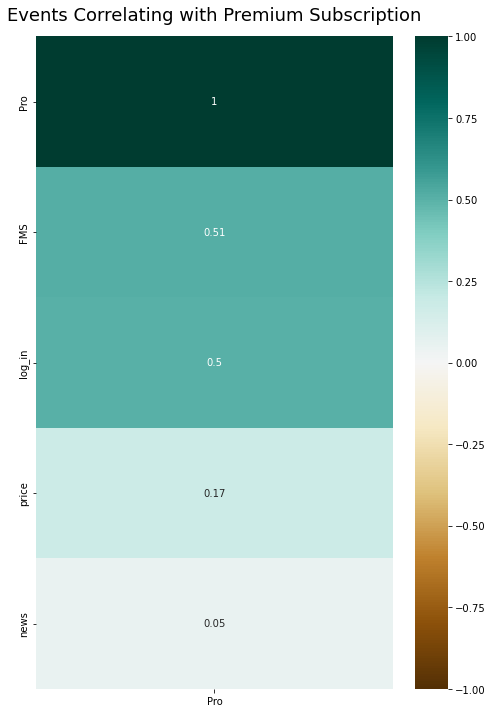

In [8]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_corr.corr()[['Pro']].sort_values(by='Pro', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Events Correlating with Premium Subscription', fontdict={'fontsize':18}, pad=16)
plt.savefig('Event to Pro.jpg', dpi=300);